In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [92]:
dataset = pd.read_csv(r'C:\Users\ssuri\Desktop\suv_data.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:>

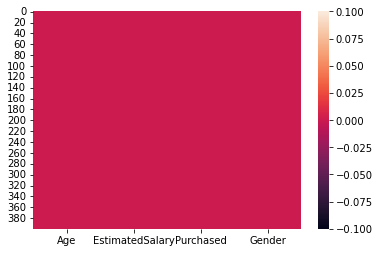

In [132]:
sns.heatmap(dataset.isnull())

In [93]:
Gender = pd.get_dummies(dataset['Gender'],drop_first=True)

In [94]:
dataset = pd.concat([dataset,Gender],axis=1)

In [95]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [96]:
dataset = dataset.drop(['User ID','Gender'],axis=1)

In [98]:
dataset = dataset.rename(columns = {"Male":"Gender"})
dataset

,Age,EstimatedSalary,Purchased,Gender
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [99]:
X = dataset.drop('Purchased',axis=1)
y = dataset['Purchased']
X.describe()

,Age,EstimatedSalary,Gender
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.490000
std,10.482877,34096.960282,0.500526
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [100]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [103]:
y_train

102    0
145    0
300    1
365    1
198    0
      ..
96     0
168    1
247    1
141    0
34     0
Name: Purchased, Length: 320, dtype: int64

In [105]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train,y_train)

LogisticRegression()

In [106]:
pred = logic.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



C:\Users\ssuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ssuri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[52,  0],
       [28,  0]], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.65